In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                            StackingRegressor, BaggingRegressor, GradientBoostingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import pickle
import os

In [82]:
df = pd.read_csv('../../2-cleaning-EDA/data/cleaned_random_replays.csv')

In [93]:
boay = pd.read_csv('../../2-cleaning-EDA/data/boay_cleaned.csv')
eden = pd.read_csv('../../2-cleaning-EDA/data/eden_cleaned.csv')
vinu = pd.read_csv('../../2-cleaning-EDA/data/vinu_cleaned.csv')
cho = pd.read_csv('../../2-cleaning-EDA/data/cho_cleaned.csv')

In [16]:
df

,shots,goals,saves,assists,score,mvp,bcpm,avg_amount,amount_collected,amount_stolen,...,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,player_rank,numeric_rank
0,0,0,1,0,220,0,241.58151,33.00,1332,224,...,68.022736,31.977266,45.251194,33.099570,27.174898,47.548515,0,0,Silver 2 Division 2,18
1,0,0,0,0,90,0,200.77383,42.48,1107,137,...,63.572340,36.427658,32.736835,31.013844,35.578260,27.416721,1,0,Silver 2 Division 2,18
2,0,0,0,0,74,0,114.26153,34.05,630,60,...,64.225230,35.774780,25.391450,34.973700,36.606007,28.021280,0,1,Silver 2 Division 2,18
3,0,0,0,0,24,0,137.69020,14.24,276,60,...,58.668950,41.331055,16.130373,35.004574,41.739420,16.462957,0,0,Platinum 1 Division 1,37
4,2,0,0,0,92,0,154.41177,43.05,672,183,...,65.157740,34.842260,27.113974,41.015625,31.709558,34.964767,0,1,Silver 3 Division 4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,0,0,0,1,82,0,220.75021,55.64,972,200,...,67.237564,32.762436,30.962566,35.239788,24.224989,37.737990,0,1,Bronze 2 Division 4,8
5130,6,4,0,1,651,1,329.76266,60.54,1452,734,...,80.040920,19.959084,48.866350,25.171278,41.485294,35.769710,0,0,Bronze 2 Division 4,8
5131,2,1,1,1,306,0,278.27320,46.01,1243,263,...,71.521706,28.478289,28.245213,34.662884,28.133278,30.558560,2,1,Grand Champion 1 Division 1,73
5132,4,1,1,0,296,0,387.52283,45.13,1731,85,...,70.528920,29.471087,32.648033,36.677734,35.744934,34.401700,1,0,Grand Champion 1 Division 1,73


In [83]:
 name_ranks = list(df.player_rank.unique())

In [84]:
number_ranks = list(df.numeric_rank.unique())

In [85]:
sorted(list(zip(number_ranks, name_ranks)))

[(1, 'Bronze 1 Division 1'),
 (2, 'Bronze 1 Division 2'),
 (3, 'Bronze 1 Division 3'),
 (4, 'Bronze 1 Division 4'),
 (5, 'Bronze 2 Division 1'),
 (6, 'Bronze 2 Division 2'),
 (7, 'Bronze 2 Division 3'),
 (8, 'Bronze 2 Division 4'),
 (9, 'Bronze 3 Division 1'),
 (10, 'Bronze 3 Division 2'),
 (11, 'Bronze 3 Division 3'),
 (12, 'Bronze 3 Division 4'),
 (14, 'Silver 1 Division 2'),
 (15, 'Silver 1 Division 3'),
 (16, 'Silver 1 Division 4'),
 (17, 'Silver 2 Division 1'),
 (18, 'Silver 2 Division 2'),
 (19, 'Silver 2 Division 3'),
 (20, 'Silver 2 Division 4'),
 (21, 'Silver 3 Division 1'),
 (22, 'Silver 3 Division 2'),
 (23, 'Silver 3 Division 3'),
 (24, 'Silver 3 Division 4'),
 (25, 'Gold 1 Division 1'),
 (26, 'Gold 1 Division 2'),
 (27, 'Gold 1 Division 3'),
 (28, 'Gold 1 Division 4'),
 (29, 'Gold 2 Division 1'),
 (30, 'Gold 2 Division 2'),
 (31, 'Gold 2 Division 3'),
 (32, 'Gold 2 Division 4'),
 (33, 'Gold 3 Division 1'),
 (34, 'Gold 3 Division 2'),
 (35, 'Gold 3 Division 3'),
 (36, 'Gold

In [86]:
dict_ranks = {}
for i in sorted(list(zip(number_ranks, name_ranks))):
    dict_ranks[i[0]] = i[1]
dict_ranks[13] = 'Silver 1 Division 1'

In [21]:
with open('dict_ranks.pkl', 'wb') as picklefile:
    pickle.dump(dict_ranks, picklefile)

In [87]:
df.drop(columns = 'player_rank', inplace=True)

In [88]:
df.dropna(inplace=True)

In [94]:
boay.dropna(inplace=True)
eden.dropna(inplace=True)
vinu.dropna(inplace= True)

In [90]:
to_drop = [
    'shots',
    'goals',
    'saves',
    'assists',
    'score',
    'mvp',
    'taken'
]

In [91]:
df.drop(columns = to_drop, inplace=True)


In [95]:
boay.drop(columns = to_drop, inplace=True)
eden.drop(columns = to_drop, inplace=True)
vinu.drop(columns = to_drop, inplace=True)
cho.drop(columns = to_drop, inplace=True)


In [96]:
boay.drop(columns = 'Unnamed: 0', inplace=True)
eden.drop(columns = 'Unnamed: 0', inplace=True)
vinu.drop(columns = 'Unnamed: 0', inplace=True)
cho.drop(columns = 'Unnamed: 0', inplace=True)

In [97]:
X = df.drop(columns = 'numeric_rank')
y = df.numeric_rank

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [49]:
y_base = [y.mean()] * len(y_train)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.6859977547966618

In [51]:
lr.score(X_test, y_test)

0.6780442663170532

In [52]:
lr.fit(X_train, y_base)

LinearRegression()

In [53]:
lr.score(X_train, y_train)

-1.6550398429515667e-07

In [54]:
lr.score(X_test, y_test)

-1.49785575809247e-06

In [31]:
ss = StandardScaler()

# X_train = ss.fit_transform(X_train)
# X_test= ss.transform(X_test)

In [32]:
poly = PolynomialFeatures(interaction_only=True)

# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

In [57]:
lr = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

In [58]:
lr.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [59]:
lr.score(X_train, y_train)

0.6880468415180079

In [60]:
lr.score(X_test, y_test)

0.6772018579690728

In [61]:
# ridge = RidgeCV(alphas = np.logspace(0,100, 100))
ridge = Pipeline([
    ('ss', StandardScaler()),
    ('ridge', RidgeCV(alphas = np.logspace(0,100, 100)))
])
    
    
ridge.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('ridge',
                 RidgeCV(alphas=array([1.00000000e+000, 1.02353102e+001, 1.04761575e+002, 1.07226722e+003,
       1.09749877e+004, 1.12332403e+005, 1.14975700e+006, 1.17681195e+007,
       1.20450354e+008, 1.23284674e+009, 1.26185688e+010, 1.29154967e+011,
       1.32194115e+012, 1.35304777e+013, 1.38488637e+014, 1.41747416e+015,
       1.45082878e+016, 1.48496...
       5.85702082e+076, 5.99484250e+077, 6.13590727e+078, 6.28029144e+079,
       6.42807312e+080, 6.57933225e+081, 6.73415066e+082, 6.89261210e+083,
       7.05480231e+084, 7.22080902e+085, 7.39072203e+086, 7.56463328e+087,
       7.74263683e+088, 7.92482898e+089, 8.11130831e+090, 8.30217568e+091,
       8.49753436e+092, 8.69749003e+093, 8.90215085e+094, 9.11162756e+095,
       9.32603347e+096, 9.54548457e+097, 9.77009957e+098, 1.00000000e+100])))])

In [62]:
ridge.score(X_train, y_train)

0.6875473593714614

In [63]:
ridge.score(X_test, y_test)

0.677661842400855

In [64]:
randf = Pipeline([
    ('ss', StandardScaler()),
    ('randf', RandomForestRegressor())
])

In [65]:
gs_randf = GridSearchCV(
    randf,
    param_grid={
        'randf__n_estimators' : [120],
        'randf__max_depth' : [7],
        'randf__min_samples_split' : [4]
    },
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

In [67]:
gs_randf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('randf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randf__max_depth': [3, 5, 7],
                         'randf__min_samples_split': [2, 3, 4, 5],
                         'randf__n_estimators': [80, 90, 100, 110, 120]},
             verbose=2)

In [68]:
gs_randf.best_params_

{'randf__max_depth': 7,
 'randf__min_samples_split': 4,
 'randf__n_estimators': 120}

In [69]:
gs_randf.score(X_train, y_train)

0.8098072107229938

In [70]:
gs_randf.score(X_test, y_test)

0.7043626599422135

In [71]:
et = Pipeline([
    ('ss', StandardScaler()),
    ('et', ExtraTreesRegressor())
])

In [72]:
gs_et = GridSearchCV(
    et,
    param_grid={
        'et__n_estimators' : [90],
        'et__min_samples_split' : [3],
        'et__max_depth' : [8],
        'et__min_samples_leaf' : [2]
    },
    verbose = 1,
    cv = 5,
    n_jobs = -1
)

In [73]:
gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('et', ExtraTreesRegressor())]),
             n_jobs=-1,
             param_grid={'et__max_depth': [3, 5, 7, 8],
                         'et__min_samples_leaf': [1, 2, 3],
                         'et__min_samples_split': [2, 3, 4, 5, 6],
                         'et__n_estimators': [80, 90, 100, 110, 120]},
             verbose=1)

In [74]:
gs_et.best_params_

{'et__max_depth': 8,
 'et__min_samples_leaf': 2,
 'et__min_samples_split': 3,
 'et__n_estimators': 90}

In [75]:
gs_et.score(X_train, y_train)

0.8013987949834174

In [76]:
gs_et.score(X_test, y_test)

0.7061779650876805

In [77]:
knn = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)


(0.7575300076414608, 0.6331696976098352)

In [78]:
gbrt = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.8254834802825721, 0.7410111069742067)

In [79]:
pipe_gbrt = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt', GradientBoostingRegressor())
])

In [82]:
gs_gbrt = GridSearchCV(
    pipe_gbrt,
    param_grid={
        'gbrt__n_estimators' : [150],
        'gbrt__learning_rate' : [0.1],
        'gbrt__max_depth' : [5],
        'gbrt__min_samples_split' : [2]
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

In [83]:
gs_gbrt.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('gbrt', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'gbrt__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.5],
                         'gbrt__max_depth': [2, 3, 5, 7],
                         'gbrt__min_samples_split': [2, 3, 4],
                         'gbrt__n_estimators': [90, 100, 110, 120, 150]},
             verbose=1)

In [84]:
gs_gbrt.best_params_

{'gbrt__learning_rate': 0.1,
 'gbrt__max_depth': 5,
 'gbrt__min_samples_split': 2,
 'gbrt__n_estimators': 150}

In [85]:
gs_gbrt.best_estimator_.score(X_train, y_train)

0.9472278204087854

In [86]:
gs_gbrt.best_estimator_.score(X_test, y_test)

0.7568867629534339

In [87]:
gbrt_2 = Pipeline([
    ('ss', StandardScaler()),
    ('gbrt_2', GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=0.8,
                                  min_samples_split=5, min_samples_leaf=5, 
                                  loss = 'squared_error', alpha = 0.5, random_state=42))
])

In [88]:
gbrt_2.fit(X_train, y_train)
gbrt_2.score(X_train, y_train), gbrt_2.score(X_test, y_test)

(0.8485000224933589, 0.7577996891846467)

In [89]:
mean_squared_error(y_test, gbrt_2.predict(X_test), squared = False)

10.579076684032543

In [90]:
gbrt_2.predict(X_test)

array([64.07390004, 52.74820236, 59.03495028, ..., 65.18443281,
       65.8134637 , 27.11153604])

In [91]:
y_test

1050    63
1307    43
4544    71
153     55
946     63
        ..
1726    47
28      78
4870    60
1047    66
2560    22
Name: numeric_rank, Length: 1283, dtype: int64

In [92]:
preds = pd.DataFrame(y_test)

preds['preds'] = gbrt_2.predict(X_test)

preds['dif'] = gbrt_2.predict(X_test) - y_test

In [93]:
preds

,numeric_rank,preds,dif
1050,63,64.073900,1.073900
1307,43,52.748202,9.748202
4544,71,59.034950,-11.965050
153,55,46.844302,-8.155698
946,63,68.348582,5.348582
...,...,...,...
1726,47,41.189657,-5.810343
28,78,79.304063,1.304063
4870,60,65.184433,5.184433
1047,66,65.813464,-0.186536


<Axes: xlabel='numeric_rank', ylabel='dif'>

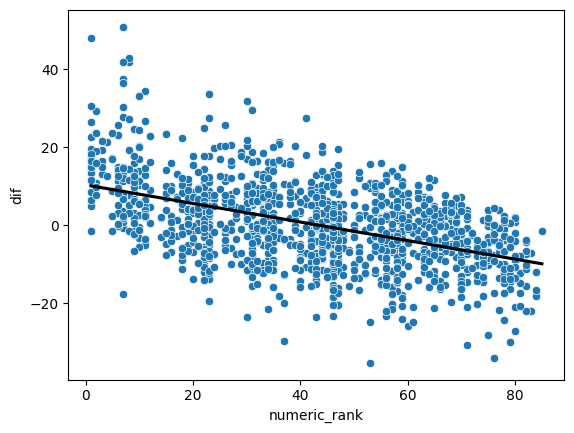

In [94]:
sns.regplot(x = preds.numeric_rank, y = preds.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

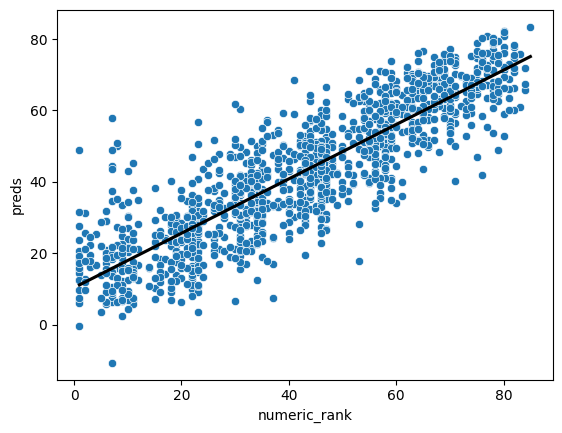

In [95]:
sns.regplot(x = preds.numeric_rank, y = preds.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.preds)

In [96]:
preds.dif.sort_values()

1075   -35.294991
3879   -34.102855
53     -30.854156
4136   -30.087578
3      -29.647699
          ...    
2354    41.895074
902     41.926383
4696    42.880219
3522    47.964481
1900    50.906827
Name: dif, Length: 1283, dtype: float64

In [97]:
preds.loc[419]

numeric_rank    47.000000
preds           29.556317
dif            -17.443683
Name: 419, dtype: float64

In [98]:
preds_2 = pd.DataFrame(y_test)

preds_2['preds'] = gbrt.predict(X_test)

preds_2['dif'] = gbrt.predict(X_test) - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

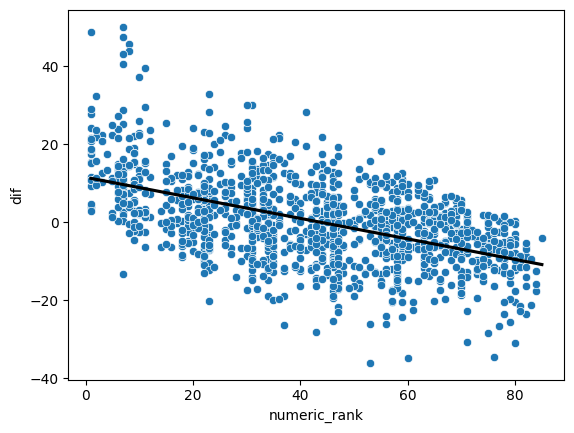

In [99]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

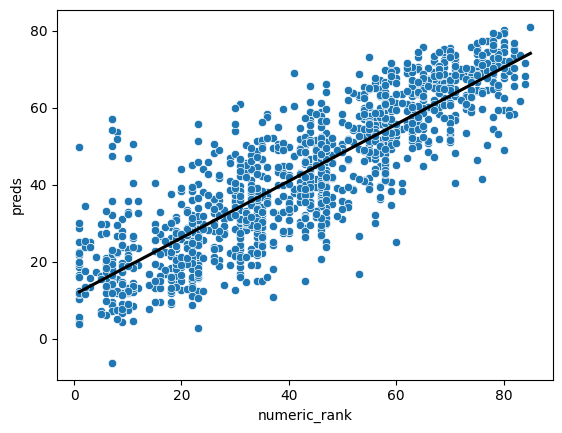

In [100]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.preds)

In [38]:
def eval_models(model, model_name:str, model_df = None, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    if model_df is None:
            model_df = pd.DataFrame(columns = ['train_r2', 'test_r2', 'MSE'])
            
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, preds, squared = False)
    
    model_df.loc[model_name,:] = [train_r2, test_r2, mse]
    print(model_df)
    
    df = pd.DataFrame(y_test)

    df['preds'] = model.predict(X_test)

    df['dif'] = model.predict(X_test) - y_test
    
    sns.set_style('darkgrid')
    
    fig, axs = plt.subplots(2,1, figsize = (14,12))
    sns.regplot(x = df.numeric_rank, y = df.preds, ci = 0, color = 'black', scatter = False, ax = axs[0])
    
    
    plt.suptitle(f"{model_name.title()} prediction comparison, differences across ranks")
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.preds)
    axs[0].text(20, 60, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.preds, ax = axs[0]).set(
            title = f"{model_name.title()} y_preds vs y_true"
    )
    
    sns.regplot(x = df.numeric_rank, y = df.dif, ci = 0, color = 'black', scatter = False, ax = axs[1])
    
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.dif)

    axs[1].text(60, 20, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.dif, color = 'green', ax= axs[1]).set(
            title = f"{model_name.title()} y_differences vs y_true"
    )
    
    return model_df

                train_r2   test_r2        MSE
gradient boost  0.825483  0.741011  10.939589


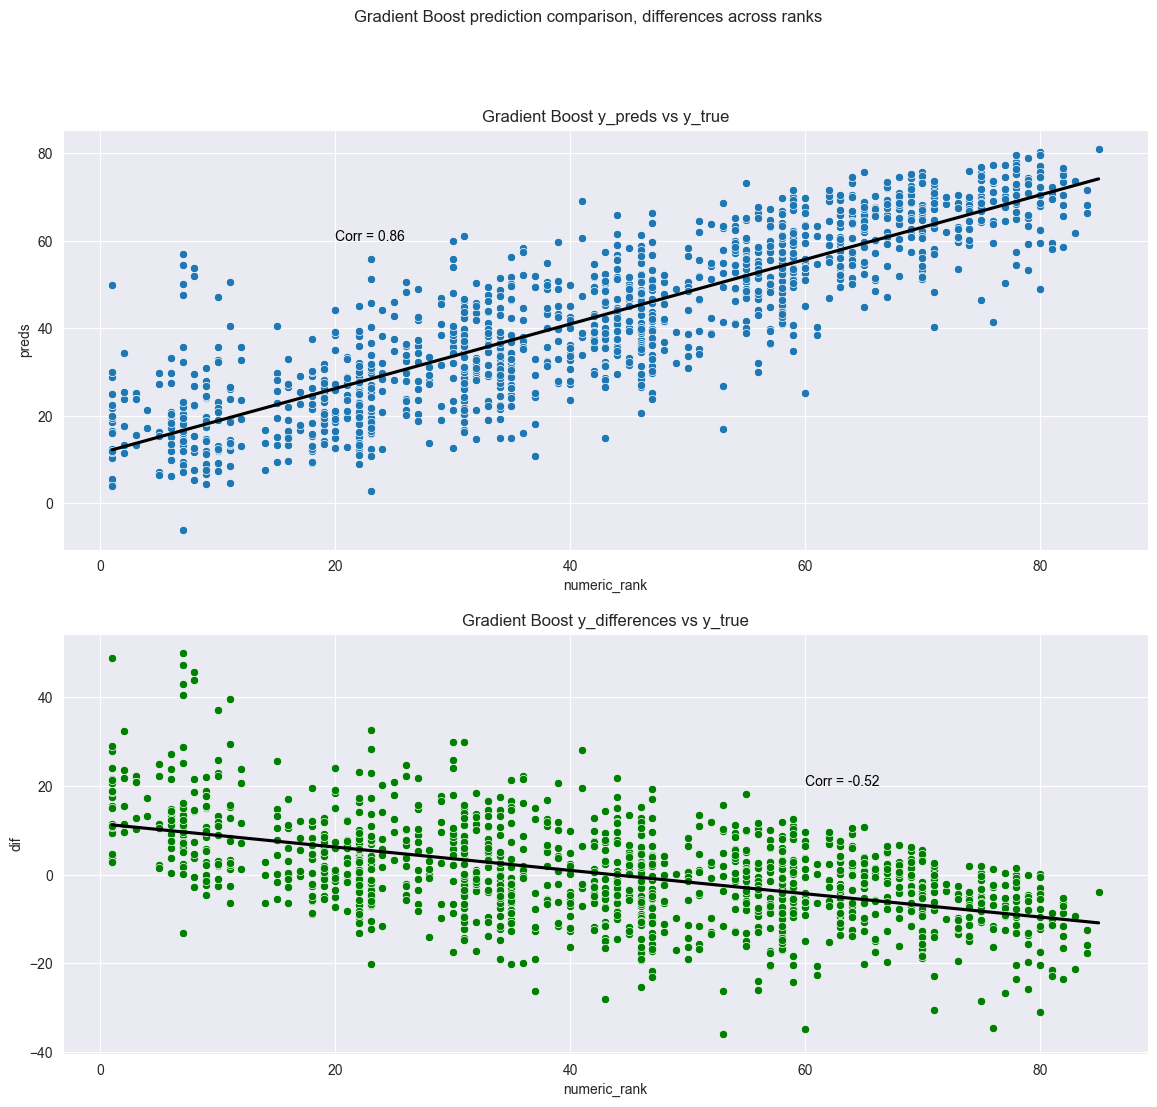

In [102]:
model_df = eval_models(gbrt, 'gradient boost')

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077


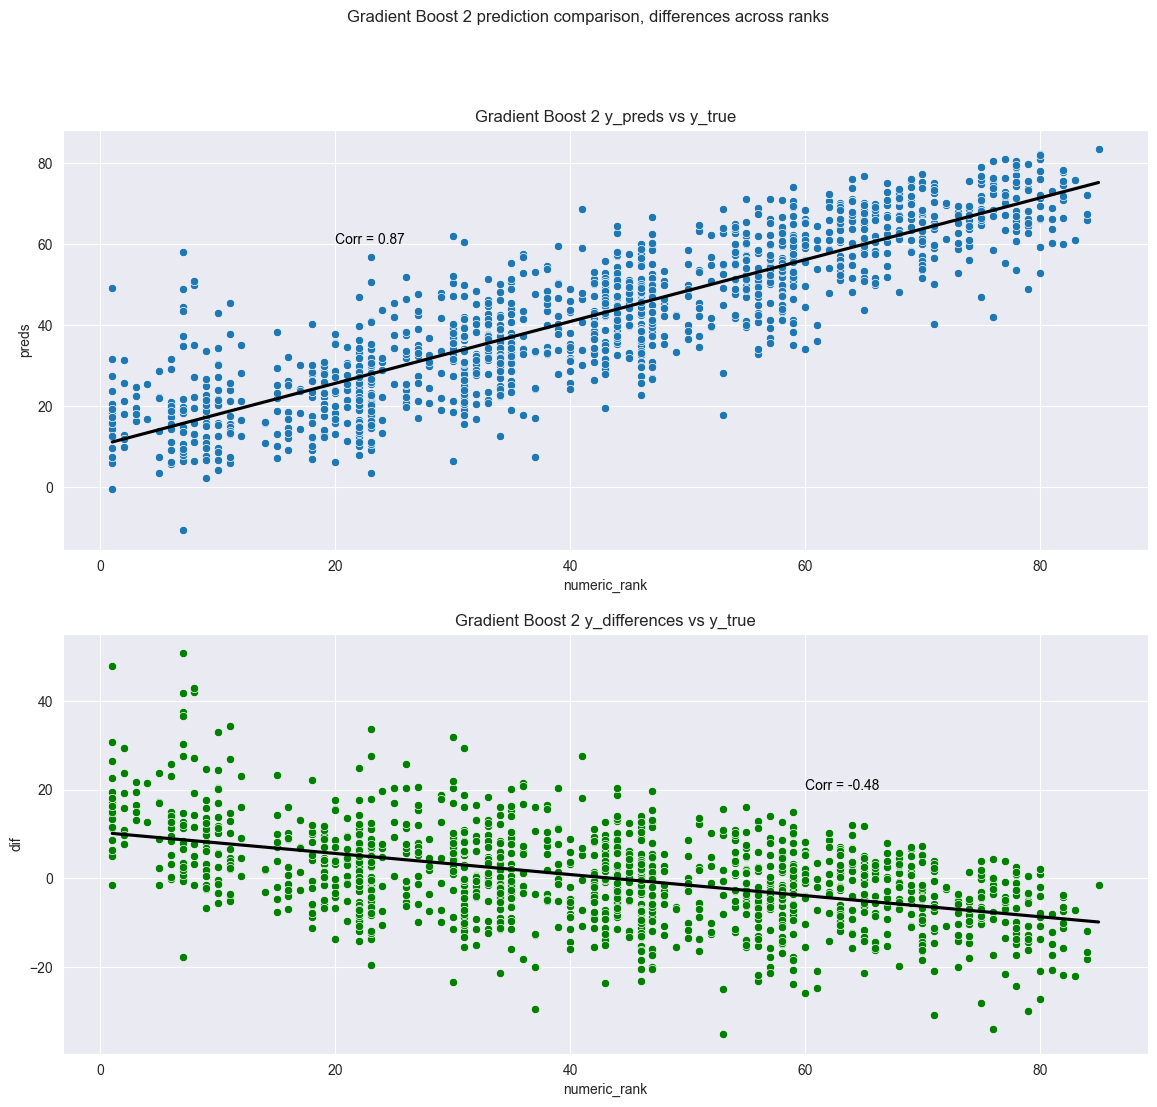

In [103]:
model_df = eval_models(gbrt_2, 'gradient boost 2', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.805168  0.710879  11.558469


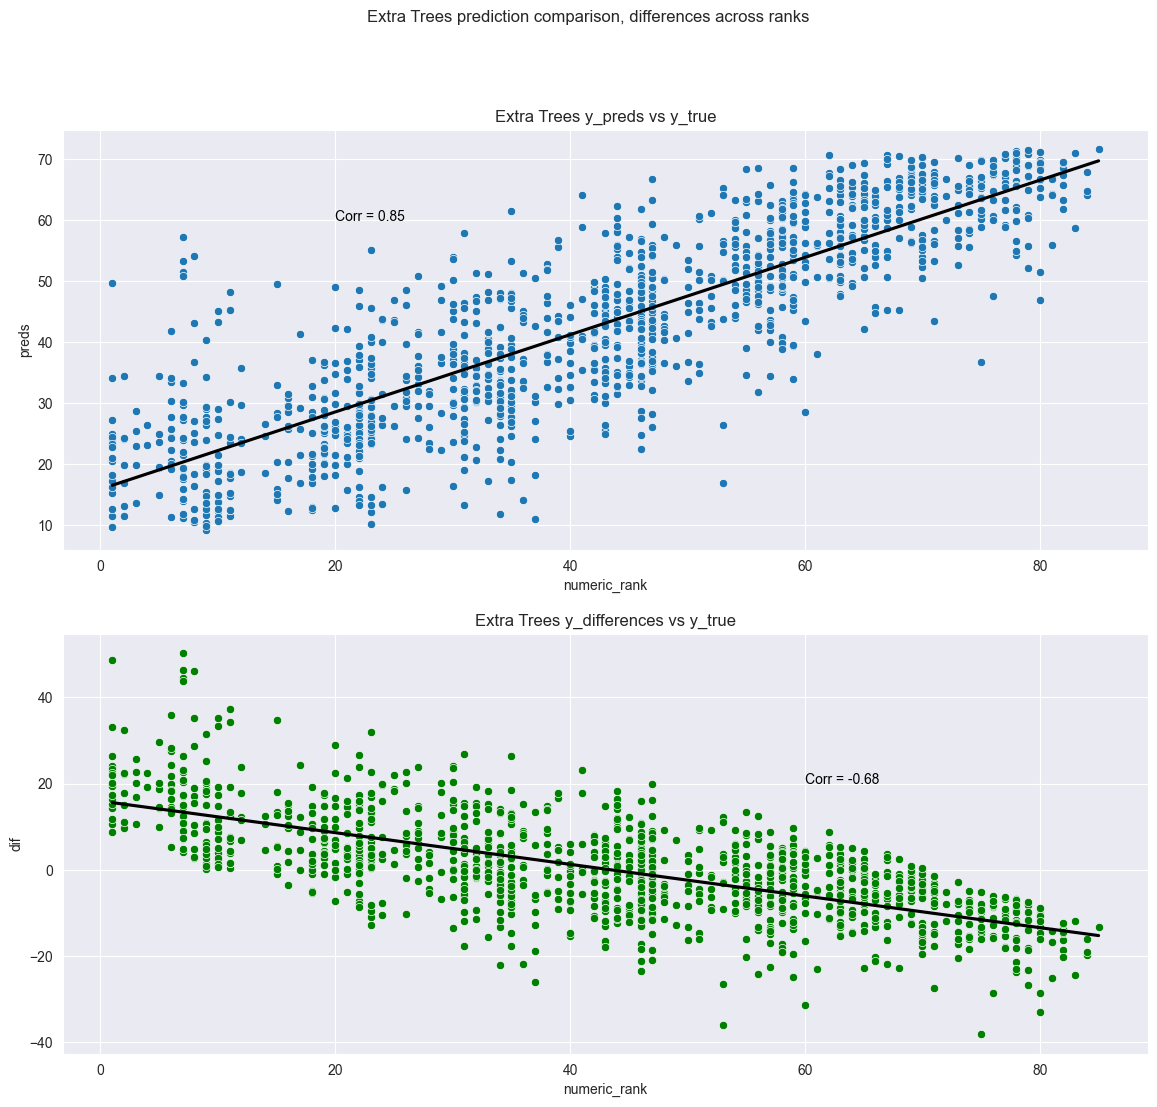

In [104]:
model_df = eval_models(gs_et.best_estimator_, 'extra trees', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.805168  0.710879  11.558469
random forest     0.809671  0.705284  11.669769


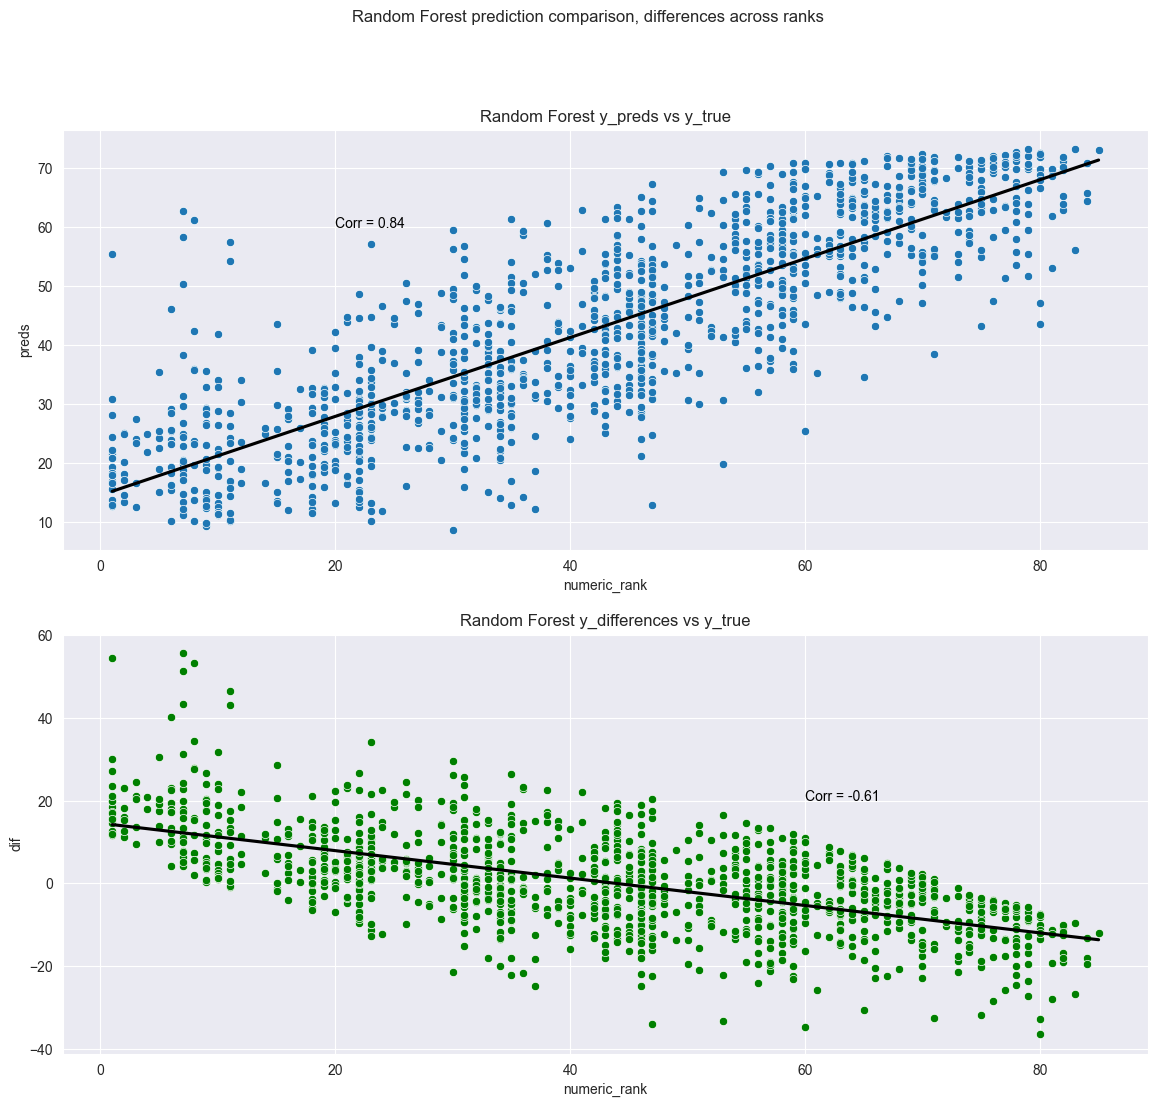

In [105]:
model_df = eval_models(gs_randf.best_estimator_, 'random forest', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.805168  0.710879  11.558469
random forest     0.809671  0.705284  11.669769
k nearest          0.75753   0.63317  13.019461


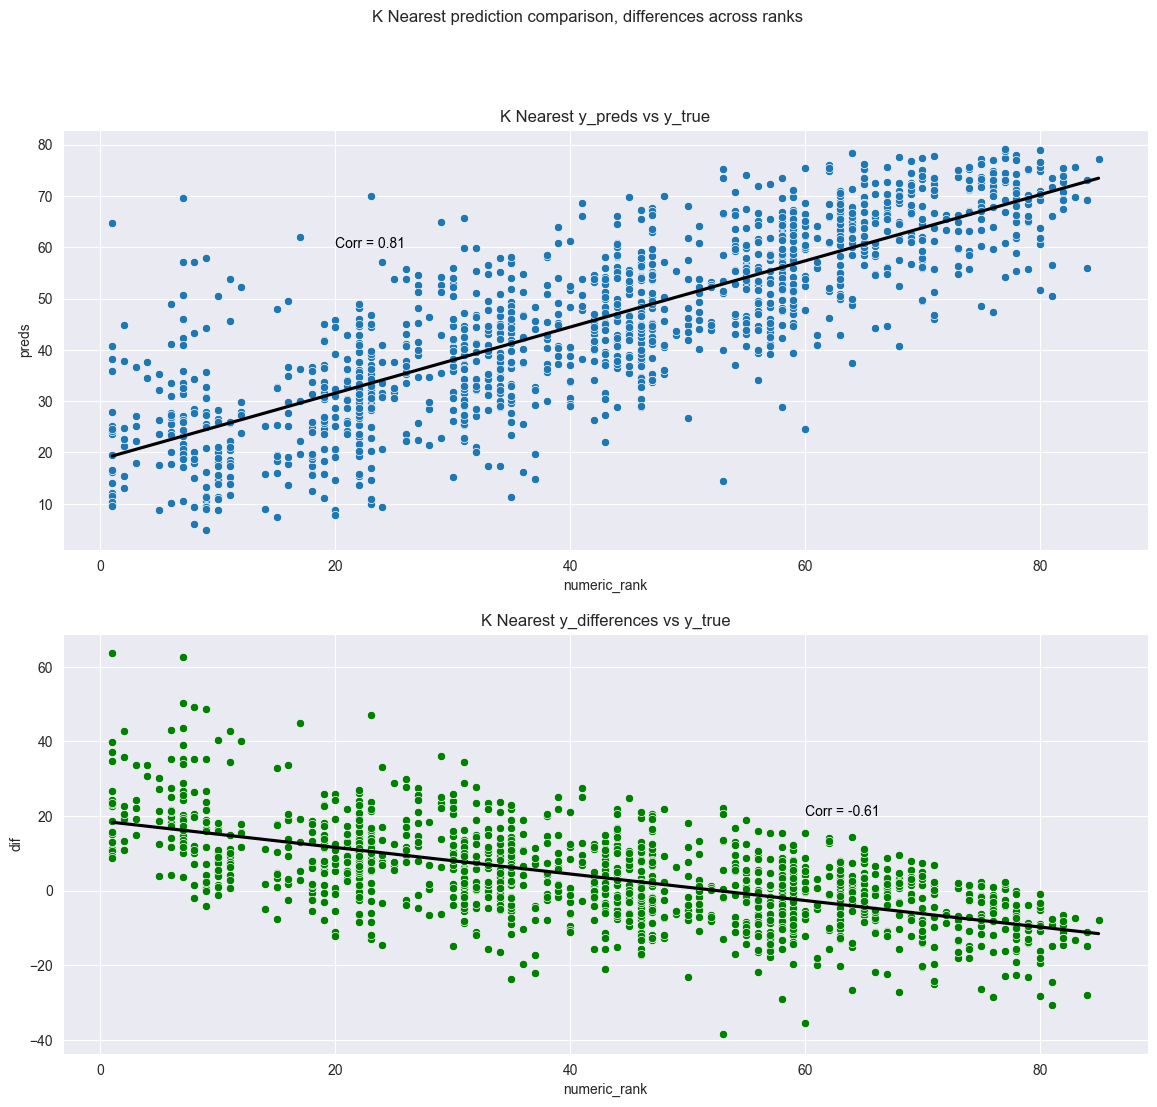

In [106]:
model_df = eval_models(knn, 'k nearest', model_df = model_df)

                          train_r2   test_r2        MSE
gradient boost            0.825483  0.741011  10.939589
gradient boost 2            0.8485    0.7578  10.579077
extra trees               0.805168  0.710879  11.558469
random forest             0.809671  0.705284  11.669769
k nearest                  0.75753   0.63317  13.019461
gradient boost (overfit)  0.947228  0.756691  10.603269


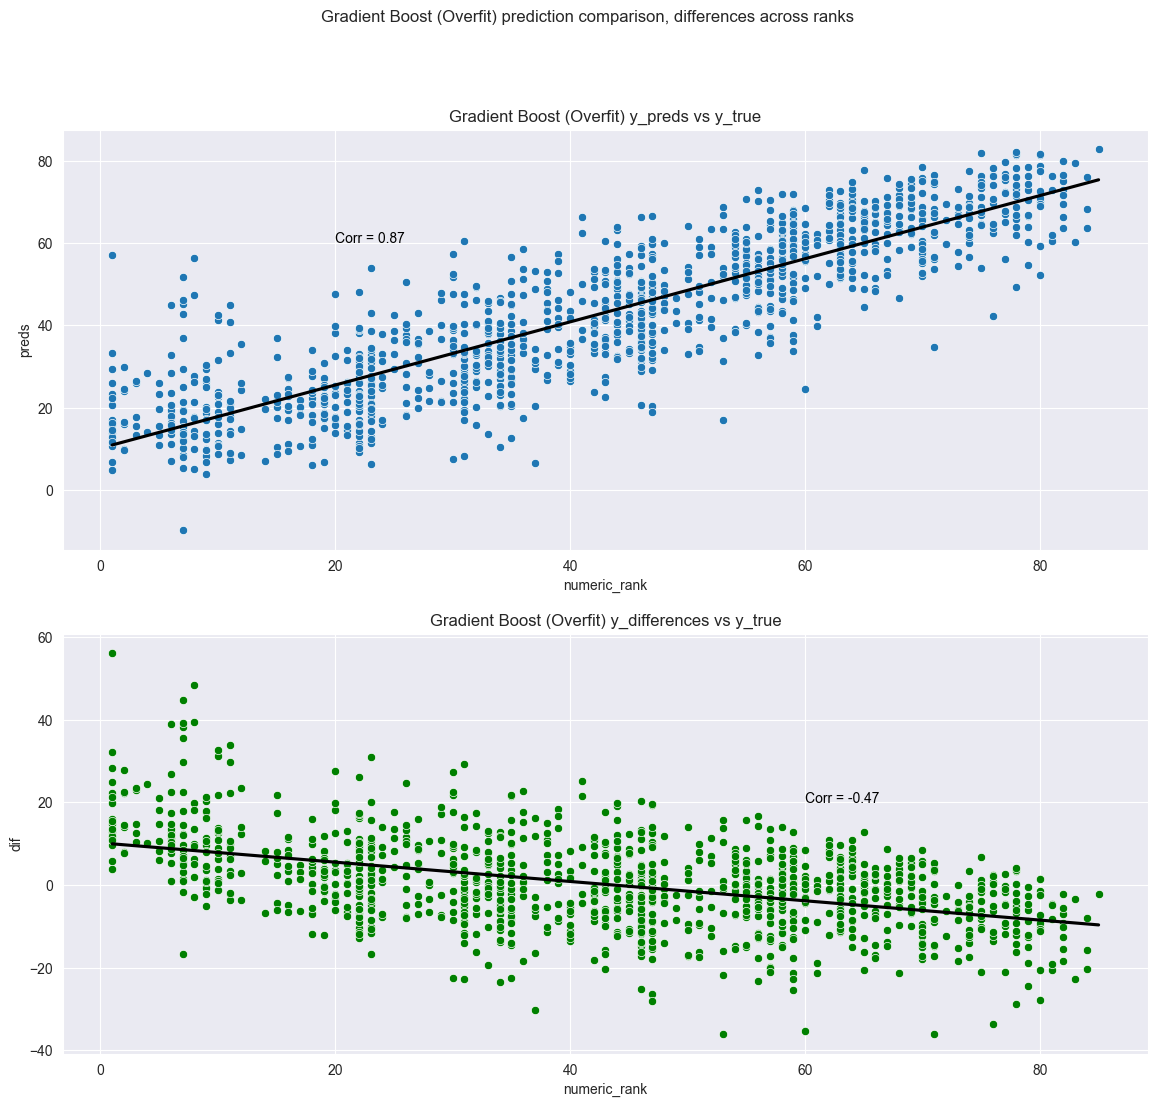

In [107]:
model_df = eval_models(gs_gbrt.best_estimator_, 'gradient boost (overfit)', model_df= model_df)

In [98]:
X_train.shape

(3846, 39)

In [99]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [104]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

model = Sequential()

model.add(Dense(32,
                input_shape = (39,),
                activation = 'relu'
               )
         )
model.add(Dense(8,
                activation = 'relu'
               )
         )

# model.add(Dense(3,
#                 activation = 'relu'
#                )
#          )

model.add(Dense(1,
                activation = 'linear'
               )
         )

model.compile(
    optimizer='adam',               
    loss='mean_squared_error',       
    metrics=['mse', 'mae']  
)

In [105]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience = 20,
                           min_delta = 0.00,
                           restore_best_weights=True
                          )

In [106]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 500, 
          batch_size = 256,
          callbacks = [early_stop]
                   )

Epoch 1/500
16/16 [==============================] - 2s 29ms/step - loss: 2289.1550 - mse: 2289.1550 - mae: 42.8921 - val_loss: 2238.8728 - val_mse: 2238.8728 - val_mae: 42.3935
Epoch 2/500
16/16 [==============================] - 0s 15ms/step - loss: 2211.5059 - mse: 2211.5059 - mae: 42.0691 - val_loss: 2160.2319 - val_mse: 2160.2319 - val_mae: 41.5442
Epoch 3/500
16/16 [==============================] - 0s 13ms/step - loss: 2129.2354 - mse: 2129.2354 - mae: 41.1849 - val_loss: 2070.1992 - val_mse: 2070.1992 - val_mae: 40.5620
Epoch 4/500
16/16 [==============================] - 0s 16ms/step - loss: 2032.0953 - mse: 2032.0953 - mae: 40.1447 - val_loss: 1959.1932 - val_mse: 1959.1932 - val_mae: 39.3602
Epoch 5/500
16/16 [==============================] - 0s 18ms/step - loss: 1913.0726 - mse: 1913.0726 - mae: 38.8805 - val_loss: 1825.4298 - val_mse: 1825.4298 - val_mae: 37.8990
Epoch 6/500
16/16 [==============================] - 0s 11ms/step - loss: 1769.7034 - mse: 1769.7034 - mae: 37

In [107]:
sns.set_style('darkgrid')

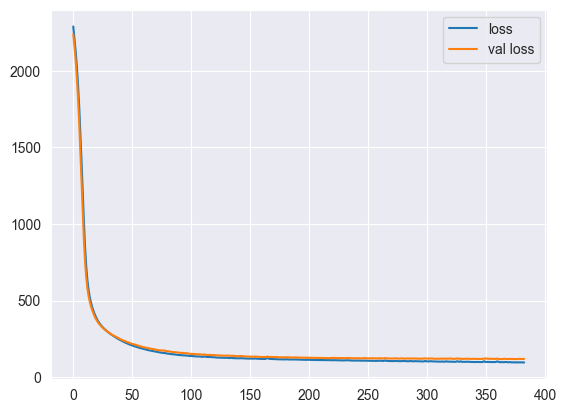

In [109]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend();

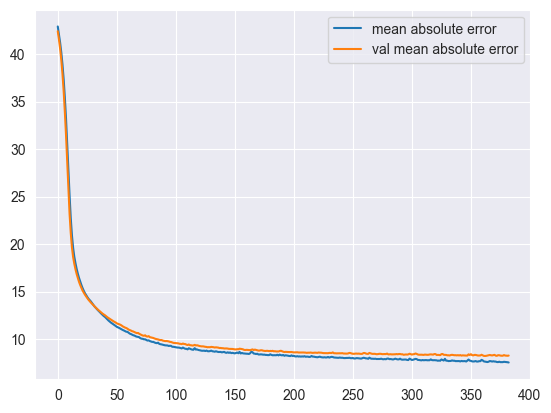

In [110]:
plt.plot(history.history['mae'], label = 'mean absolute error')
plt.plot(history.history['val_mae'], label = 'val mean absolute error')
plt.legend();

In [111]:
pd.DataFrame(model.predict(X_test))

41/41 [==============================] - 0s 5ms/step


,0
0,67.202278
1,44.278999
2,55.974113
3,39.765606
4,64.092606
...,...
1278,46.112206
1279,78.023521
1280,53.213753
1281,63.761497


In [112]:
preds_nn = pd.DataFrame(y_test)

preds_nn['preds'] = model.predict(X_test)

41/41 [==============================] - 0s 5ms/step


In [113]:
preds_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1050 to 2560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numeric_rank  1283 non-null   int64  
 1   preds         1283 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 25.1 KB


In [114]:
preds_nn['dif'] = preds_nn.preds - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

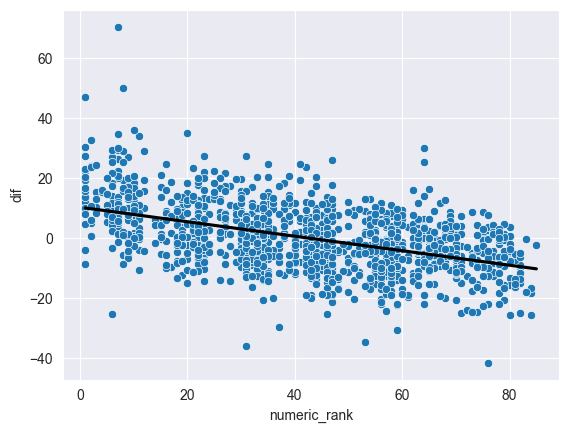

In [115]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.dif, ci = 0, color = 'black', scatter = False)


sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

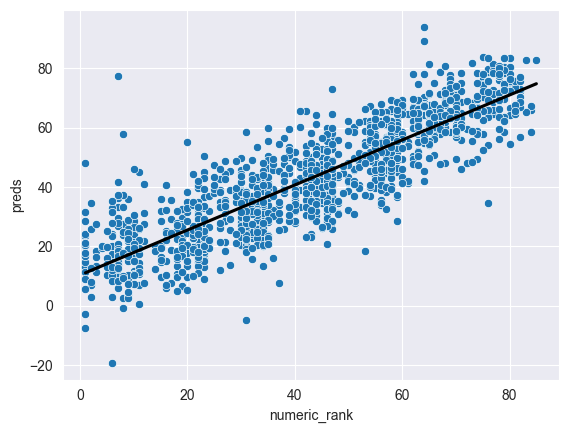

In [116]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.preds)

In [117]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 9ms/step - loss: 117.2778 - mse: 117.2778 - mae: 8.2365


[117.27775573730469, 117.27775573730469, 8.23650074005127]

In [118]:
preds_nn.head(20)

,numeric_rank,preds,dif
1050,63,67.202278,4.202278
1307,43,44.278999,1.278999
4544,71,55.974113,-15.025887
153,55,39.765606,-15.234394
946,63,64.092606,1.092606
4251,50,43.285172,-6.714828
4700,73,65.258102,-7.741898
2763,80,75.084442,-4.915558
3047,31,28.536947,-2.463053
3329,34,22.322598,-11.677402


In [119]:
with open('nn_model_rank_0.pkl', 'wb') as picklefile:
    pickle.dump((model, ss), picklefile)

In [278]:
with open('gbrt_2.pkl', 'wb') as picklefile:
    pickle.dump(gbrt_2, picklefile)

In [120]:
boay.drop(columns = 'player_name', inplace = True)
eden.drop(columns = 'player_name', inplace = True)
vinu.drop(columns = 'player_name', inplace = True)
cho.drop(columns = 'player_name', inplace = True)

In [53]:
boay

,bcpm,avg_amount,amount_collected,amount_stolen,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,...,percent_defensive_half,percent_offensive_half,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken
0,420.56630,46.15,2458,558,1802,656,308,337,11.398180,8.495166,...,72.465836,27.534163,74.541145,25.458858,36.929306,29.030142,29.571960,40.180220,0,1
1,420.65347,46.35,2459,558,1803,656,320,338,11.421567,8.487769,...,72.470170,27.529830,74.554900,25.445095,36.323204,28.568170,29.252438,39.830074,0,1
2,359.35208,47.53,2041,178,1394,647,330,312,12.263043,9.302189,...,79.184140,20.815855,76.163390,23.836603,38.529255,32.425613,36.181700,31.457245,1,1
3,393.23465,49.83,2263,588,1674,589,449,296,10.217498,8.523270,...,60.963670,39.036340,66.491560,33.508442,27.310375,39.937440,33.044685,35.187813,0,1
4,393.79007,50.20,2304,280,1717,587,422,183,11.303233,11.288991,...,76.566284,23.433712,70.829850,29.170145,31.477000,35.009260,32.986755,36.575985,0,2
5,393.83493,50.20,2304,280,1717,587,422,183,11.295975,11.256088,...,76.610820,23.389183,70.790570,29.209427,31.537561,35.241160,32.591663,36.751087,0,2
6,419.28705,44.59,2029,320,1293,736,208,344,11.162390,5.658688,...,64.744095,35.255905,66.970700,33.029300,31.548130,36.920956,33.270190,31.065954,0,1
7,363.50080,39.45,1950,505,1089,861,110,283,10.998230,2.165471,...,65.821980,34.178010,69.570560,30.429436,30.882034,39.891880,29.204338,43.309410,2,0
8,449.93176,53.52,2472,643,1936,536,366,373,13.092674,7.225846,...,59.321000,40.679000,67.305570,32.694430,28.029730,43.136660,32.489002,36.553920,1,0
9,358.00120,48.11,2006,166,1212,794,207,107,11.029150,6.748959,...,71.735466,28.264528,75.087020,24.912981,38.191547,29.268291,28.524687,39.024387,1,1


In [260]:
boay_preds = gbrt_2.predict(boay)

In [261]:
boay_preds = [dict_ranks[int(pred)] for pred in boay_preds]
boay_preds

['Champion 3 Division 3',
 'Champion 3 Division 3',
 'Diamond 1 Division 4',
 'Champion 2 Division 4',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Diamond 3 Division 1',
 'Champion 2 Division 1',
 'Champion 3 Division 2',
 'Diamond 2 Division 1',
 'Champion 2 Division 3',
 'Champion 3 Division 4',
 'Champion 2 Division 1',
 'Diamond 2 Division 1',
 'Champion 2 Division 2',
 'Diamond 2 Division 4',
 'Diamond 3 Division 3',
 'Grand Champion 1 Division 1']

In [121]:
boay_nn_preds = model.predict(ss.transform(boay))

boay_nn_preds_rank = [dict_ranks[int(pred)] for pred in boay_nn_preds]

boay_nn_preds_rank

1/1 [==============================] - 0s 124ms/step


['Champion 1 Division 4',
 'Champion 1 Division 4',
 'Diamond 3 Division 1',
 'Champion 2 Division 3',
 'Champion 1 Division 1',
 'Champion 1 Division 2',
 'Champion 2 Division 2',
 'Champion 3 Division 2',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Diamond 3 Division 2',
 'Champion 2 Division 1',
 'Champion 2 Division 3',
 'Champion 1 Division 3',
 'Diamond 3 Division 2',
 'Diamond 3 Division 2',
 'Champion 1 Division 1',
 'Champion 2 Division 1',
 'Champion 2 Division 2']

(1.0, 85.0)

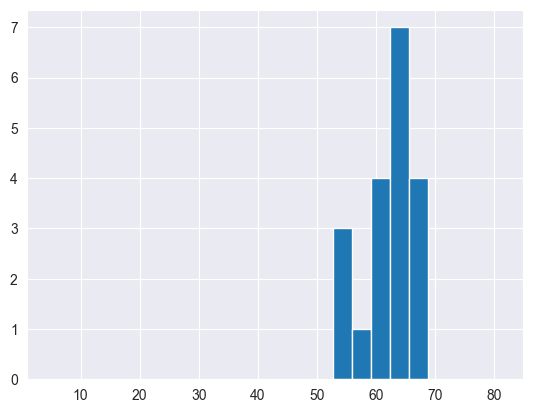

In [55]:
plt.hist(boay_nn_preds, bins = 5)
plt.xlim(1,85)

In [264]:
boay.to_csv('../data/boay_for_testing.csv')

In [56]:
eden.drop(columns = 'goals_against_while_last_defender', inplace = True)
vinu.drop(columns = 'goals_against_while_last_defender', inplace = True)
cho.drop(columns = 'goals_against_while_last_defender', inplace = True)

In [ ]:
eden_preds = gbrt_2.predict(eden)
eden_preds = [dict_ranks[int(pred)] for pred in eden_preds]
eden_preds

In [58]:
eden_nn_preds = model.predict(ss.transform(eden))

eden_nn_preds_rank = [dict_ranks[int(pred)] for pred in eden_nn_preds]

eden_nn_preds_rank

1/1 [==============================] - 0s 161ms/step


['Champion 3 Division 4',
 'Champion 3 Division 4',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Champion 2 Division 2',
 'Champion 3 Division 2',
 'Champion 3 Division 3',
 'Champion 3 Division 1',
 'Champion 3 Division 1',
 'Champion 2 Division 3',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 1 Division 4',
 'Champion 2 Division 3',
 'Champion 2 Division 3',
 'Champion 2 Division 4',
 'Diamond 3 Division 2',
 'Grand Champion 1 Division 1',
 'Champion 2 Division 3',
 'Grand Champion 2 Division 4',
 'Champion 2 Division 1',
 'Diamond 2 Division 2',
 'Champion 1 Division 3',
 'Champion 3 Division 3']

(1.0, 85.0)

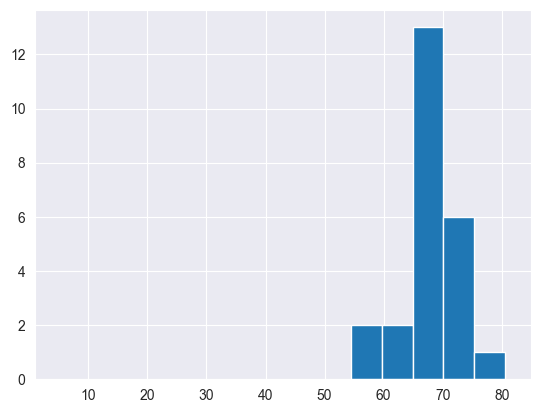

In [59]:
plt.hist(eden_nn_preds, bins = 5)
plt.xlim(1,85)

In [269]:
vinu_preds = gbrt_2.predict(vinu)
vinu_preds = [dict_ranks[int(pred)] for pred in vinu_preds]
vinu_preds

['Diamond 3 Division 2',
 'Champion 1 Division 1',
 'Diamond 3 Division 4',
 'Champion 3 Division 2',
 'Champion 1 Division 2',
 'Champion 3 Division 3',
 'Champion 2 Division 2',
 'Diamond 2 Division 2',
 'Diamond 2 Division 3',
 'Platinum 3 Division 2',
 'Platinum 3 Division 1',
 'Champion 1 Division 3',
 'Grand Champion 1 Division 4',
 'Diamond 1 Division 2',
 'Platinum 3 Division 3',
 'Champion 2 Division 4',
 'Champion 2 Division 1',
 'Champion 3 Division 2',
 'Champion 3 Division 2']

In [270]:
vinu_nn_preds = model.predict(ss.transform(vinu))

vinu_nn_preds_rank = [dict_ranks[int(pred)] for pred in vinu_nn_preds]

vinu_nn_preds_rank

1/1 [==============================] - 0s 143ms/step


['Diamond 1 Division 2',
 'Diamond 1 Division 4',
 'Diamond 1 Division 3',
 'Champion 2 Division 3',
 'Champion 3 Division 1',
 'Champion 3 Division 1',
 'Champion 3 Division 1',
 'Champion 1 Division 4',
 'Champion 2 Division 2',
 'Diamond 1 Division 4',
 'Gold 3 Division 4',
 'Diamond 3 Division 1',
 'Champion 3 Division 4',
 'Diamond 1 Division 4',
 'Diamond 2 Division 1',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 3 Division 2',
 'Champion 3 Division 2']

(1.0, 85.0)

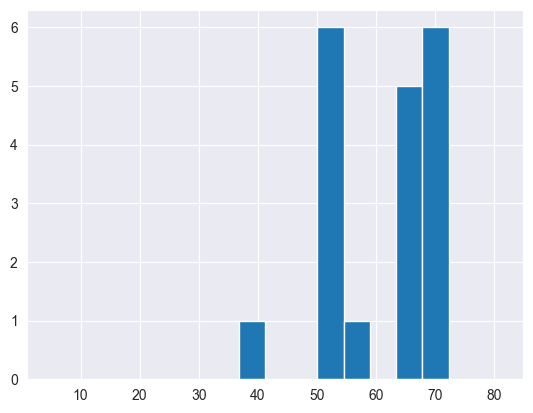

In [271]:
plt.hist(vinu_nn_preds, bins = 8)
plt.xlim(1,85)

In [272]:
cho_preds = gbrt_2.predict(cho)
cho_preds = [dict_ranks[int(pred)] for pred in cho_preds]
cho_preds

['Diamond 3 Division 3',
 'Diamond 3 Division 2',
 'Champion 3 Division 3',
 'Diamond 2 Division 4',
 'Diamond 3 Division 3',
 'Champion 3 Division 1',
 'Diamond 2 Division 4',
 'Diamond 3 Division 2',
 'Champion 3 Division 3',
 'Diamond 3 Division 2',
 'Diamond 3 Division 1',
 'Platinum 3 Division 4',
 'Champion 2 Division 4',
 'Diamond 1 Division 1',
 'Diamond 3 Division 1',
 'Diamond 1 Division 3',
 'Diamond 3 Division 4',
 'Diamond 2 Division 2',
 'Diamond 2 Division 2']

In [273]:
cho_nn_preds = model.predict(ss.transform(cho))

cho_nn_preds_rank = [dict_ranks[int(pred)] for pred in cho_nn_preds]

cho_nn_preds_rank

1/1 [==============================] - 0s 131ms/step


['Diamond 3 Division 4',
 'Diamond 3 Division 3',
 'Grand Champion 1 Division 1',
 'Champion 1 Division 4',
 'Champion 2 Division 2',
 'Champion 2 Division 4',
 'Diamond 3 Division 3',
 'Diamond 3 Division 2',
 'Champion 3 Division 2',
 'Diamond 3 Division 2',
 'Diamond 3 Division 3',
 'Diamond 3 Division 4',
 'Diamond 3 Division 4',
 'Diamond 1 Division 4',
 'Diamond 2 Division 1',
 'Platinum 3 Division 4',
 'Diamond 3 Division 2',
 'Diamond 2 Division 4',
 'Champion 2 Division 2']

(1.0, 85.0)

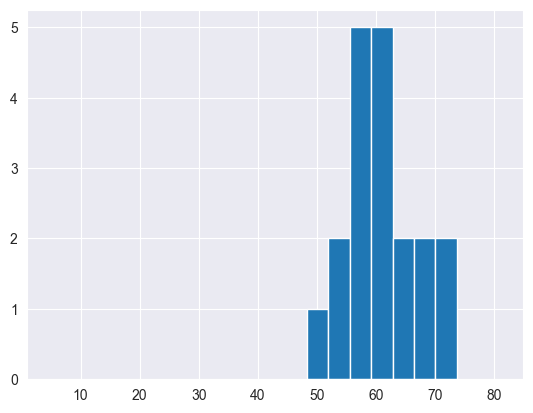

In [274]:
plt.hist(cho_nn_preds, bins = 7)
plt.xlim(1,85)

In [62]:
def predict_rank(df):
    
    df.dropna(inplace =True)
    
    to_drop = [
    # 'shots',
    # 'goals',
    # 'saves',
    # 'assists',
    # 'score',
    # 'mvp'
    ]
    
    df.drop(columns = to_drop, inplace = True)
    
    try:
        df.drop(columns = 'Unnamed: 0', inplace = True)
    except KeyError:
        pass
    
    try:
        df.drop(columns = 'player_name', inplace = True)
    except KeyError:
        pass
    
    rank_preds = model.predict(ss.transform(df))
    rank_preds = [dict_ranks[int(pred)] for pred in rank_preds]
    return rank_preds

In [63]:
predict_rank(boay)

1/1 [==============================] - 0s 32ms/step


['Champion 1 Division 4',
 'Champion 2 Division 1',
 'Diamond 3 Division 1',
 'Champion 1 Division 1',
 'Champion 1 Division 4',
 'Champion 1 Division 4',
 'Champion 1 Division 3',
 'Champion 2 Division 3',
 'Champion 1 Division 2',
 'Champion 2 Division 3',
 'Diamond 2 Division 3',
 'Champion 1 Division 1',
 'Champion 2 Division 4',
 'Champion 2 Division 2',
 'Diamond 2 Division 2',
 'Diamond 3 Division 3',
 'Diamond 1 Division 4',
 'Diamond 3 Division 4',
 'Champion 1 Division 4']